<a href="https://colab.research.google.com/github/Aaron-anayst/Twitter-Data-Analysis/blob/main/EDA_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Objective **
### Social Media Tweet Analysis on Twitter Dataset
*   Topic Modeling on Twitter Dataset
*   Sentiment analysis on Twitter Dataset








### **Business understanding**

### **Topic modeling**
Topic modeling is a type of statistical model for discovering the abstract "topics" that occur in a collection of texts.


*   Our task here is to discover abstract topics from tweets.


### **Sentiment analysis**
 It is used in social media monitoring, allowing businesses to gain insights about how customers feel about certain topics, and detect urgent issues in real time before they spiral out of control.


*   Our task here is to classify a tweet as a positive or negative tweet sentiment wise.




## Data Understanding
### Loading necessary packages

In [158]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS,WordCloud
from gensim import corpora
import pandas as pd
import statistics
import string
import os
import re

Data acquisition

For this example we have two option for data acquisition:

*   You can download Twitter dataset directly from Twitter
*   By registering as a developer using this link [Here](https://developer.twitter.com/en) 

*   Or you can use downloaded data found at Week0/data/cleaned_fintech_data.csv 



In [160]:
from google.colab import drive
drive.mount('/content/drive/')
#To Change my directory

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [161]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [162]:
ls

 5363750.docx
 AI_Based_Security_Thesis.gdoc
 AI_Based_Security_Thesis.pdf
'Anomaly Intrusion Detection using GAN  Final (1).gdoc'
'Anomaly Intrusion Detection using GAN  Final.gdoc'
'Anomaly Intrusion Detection using GAN  Final.pdf'
'Aron cv.gdoc'
 Author.docx
'badpdf.pdf (malicious pdf) analysis.gdoc'
'Bilew Alemu.gdoc'
'Bilew Thesis.gdoc'
'Chapter Five: Conclusions and Future Works .gdoc'
'Chapter Four: Evaluation of the Proposed Approach.gdoc'
'Chapter Four: Experimentation and Analysis of Results.gdoc'
'Chapter One: Introduction .gdoc'
'Chapter Three: Proposed Approach.gdoc'
'Chapter Two: Review of Related Works.gdoc'
 Classroom/
 cleaned_fintech_data.csv
'Colab Notebooks'/
 contribution.gdoc
'Copy of CV Template 1.docx'
'DNS SINKHOLE PROJECT Schedule (1).gdoc'
'DNS SINKHOLE PROJECT Schedule.gdoc'
'DNS SINKHOLE PROJECT Schedule.pdf'
 Economic_Twitter_Data.json
 fffff.gdoc
'fikirte cv (1).gdoc'
'fikirte cv.gdoc'
'fikirte cv.pdf'
 Final.gdoc
 gebre.gdoc
 Github/
'Ideas to improve th

In [163]:
#To read csv file and create dataframe
tweets = pd.read_csv('/content/drive/MyDrive/cleaned_fintech_data.csv')
tweets.head()

,Unnamed: 0,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,...,original_author,screen_count,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries,timestamp
0,0.0,Thu Jun 17 06:26:34 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Giving forth life is becoming a burden in Keny...,Giving forth life becoming burden Kenya This m...,"Sentiment(polarity=0.3194444444444445, subject...",0.3194444444444445,0.5305555555555556,en,0,...,reen_law,398,70,223,NaN,NaN,janetmachuka_,NaN,NaN,2021-06-17 06:26:34+00:00
1,1.0,Thu Jun 17 06:26:37 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Teenmaar - 26cr\nPanja - 32.5cr\nGabbarsingh -...,Teenmaar crPanja crGabbarsingh cr Khaleja Kuda...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,in,0,...,Amigo9999_,19047,132,1084,NaN,NaN,maheshblood,NaN,India,2021-06-17 06:26:37+00:00
2,2.0,Thu Jun 17 06:26:42 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Rei chintu 2013 lo Vachina Ad Nizam ne 2018 lo...,Rei chintu lo Vachina Ad Nizam ne lo kottaru f...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,hi,0,...,MallaSuhaas,47341,2696,2525,NaN,NaN,Hail_Kalyan,NaN,Vizag,2021-06-17 06:26:42+00:00
3,3.0,Thu Jun 17 06:26:44 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",Today is World Day to Combat #Desertification ...,Today World Day Combat Restoring degraded land...,"Sentiment(polarity=0.25, subjectivity=0.65)",0.25,0.65,en,0,...,CIACOceania,7039,343,387,NaN,"Desertification, Drought, resilience",EdwardVrkic,NaN,Papua New Guinea,2021-06-17 06:26:44+00:00
4,4.0,Thu Jun 17 06:26:47 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Hearing #GregHunt say he's confident vaccines ...,Hearing say 's confident vaccines delivered li...,"Sentiment(polarity=0.5, subjectivity=0.8333333...",0.5,0.8333333333333334,en,0,...,MccarronWendy,26064,419,878,NaN,"GregHunt, Morrison",WriteWithDave,NaN,"Sydney, New South Wales",2021-06-17 06:26:47+00:00


In [164]:
#To get information abou the data
tweets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5621 entries, 0 to 5620
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              5620 non-null   float64
 1   created_at              5621 non-null   object 
 2   source                  5621 non-null   object 
 3   original_text           5621 non-null   object 
 4   clean_text              5617 non-null   object 
 5   sentiment               5621 non-null   object 
 6   polarity                5621 non-null   object 
 7   subjectivity            5621 non-null   object 
 8   lang                    5621 non-null   object 
 9   favorite_count          5621 non-null   object 
 10  retweet_count           5621 non-null   object 
 11  original_author         5621 non-null   object 
 12  screen_count            5621 non-null   object 
 13  followers_count         5621 non-null   object 
 14  friends_count           5621 non-null   

#### Check if there are errors in the data

In [165]:
print("The number of missing value(s): {}".format(tweets.isnull().sum().sum()))
print("Columons having columns value:{}".format(tweets.columns[tweets.isnull().any()]))

The number of missing value(s): 17941
Columons having columns value:Index(['Unnamed: 0', 'clean_text', 'possibly_sensitive', 'hashtags', 'place',
       'place_coord_boundaries'],
      dtype='object')


### Data Preparation 

*   Making correction 
*   Reformatting
*   Combining Dataset




In [166]:
tweets_df = pd.DataFrame(columns=['original_text','lang'])

tweets_df['original_text'] =  tweets['original_text'].to_list()


In [167]:
# drop row having Null value
tweets_df.dropna()
tweets_df

,original_text,lang
0,Giving forth life is becoming a burden in Keny...,NaN
1,Teenmaar - 26cr\nPanja - 32.5cr\nGabbarsingh -...,NaN
2,Rei chintu 2013 lo Vachina Ad Nizam ne 2018 lo...,NaN
3,Today is World Day to Combat #Desertification ...,NaN
4,Hearing #GregHunt say he's confident vaccines ...,NaN
...,...,...
5616,"Lambie has voted AGAINST Medivac, Carbon tax, ...",NaN
5617,Idhi me bathuku \nMost Day1 Records In Nizam f...,NaN
5618,welkin moon giveaway bc i finally have money!\...,NaN
5619,Manam edi chesina \n\nDaaniki kuda elevation i...,NaN


## **Assignment 1 for Practice**
### Write a function that change **Null** values for columns Hashtages by mostly occured Hashtage.



### uni-variate Analysis on Hashtags

In [168]:
re.findall?

In [169]:
#Method to find hashtags from tweets
def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

In [170]:
# update Hashtage columon with hashtages extracted from Orignal_text columon
tweets_df['hashtags'] = tweets_df.original_text.apply(find_hashtags)
print(tweets_df['hashtags'])

0                                                      []
1                                                      []
2                                                      []
3       [#Desertification, #Drought, #resilience, #bio...
4                         [#GregHunt, #Morrison, #auspol]
                              ...                        
5616                                             [#QandA]
5617                                                   []
5618                                                   []
5619                                                   []
5620                                                   []
Name: hashtags, Length: 5621, dtype: object


In [171]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = tweets_df.loc[
                       tweets_df.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

In [172]:
hashtags_list_df

,hashtags
3,"[#Desertification, #Drought, #resilience, #bio..."
4,"[#GregHunt, #Morrison, #auspol]"
5,"[#HowRutoSabotagedUhuru, #JKLive, #javascript,..."
6,"[#Desertification, #Drought, #resilience, #bio..."
9,[#microgrids]
...,...
5611,[#QandA]
5613,"[#npcindia, #webinar, #wastemgmt, #carboncredi..."
5614,"[#mobilemoney, #Burundi, #youth, #innovation]"
5615,"[#CarbonSmart, #OurCleanFuture]"


In [173]:
 #create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

In [174]:
flattened_hashtags_df

,hashtag
0,#Desertification
1,#Drought
2,#resilience
3,#biodiversity
4,#climatechange
...,...
4245,#youth
4246,#innovation
4247,#CarbonSmart
4248,#OurCleanFuture


In [175]:
#add flatten_hashtags to tweet_df
tweets_df["flattened_hashtags"]= flattened_hashtags_df

In [176]:
tweets_df

,original_text,lang,hashtags,flattened_hashtags
0,Giving forth life is becoming a burden in Keny...,NaN,[],#Desertification
1,Teenmaar - 26cr\nPanja - 32.5cr\nGabbarsingh -...,NaN,[],#Drought
2,Rei chintu 2013 lo Vachina Ad Nizam ne 2018 lo...,NaN,[],#resilience
3,Today is World Day to Combat #Desertification ...,NaN,"[#Desertification, #Drought, #resilience, #bio...",#biodiversity
4,Hearing #GregHunt say he's confident vaccines ...,NaN,"[#GregHunt, #Morrison, #auspol]",#climatechange
...,...,...,...,...
5616,"Lambie has voted AGAINST Medivac, Carbon tax, ...",NaN,[#QandA],NaN
5617,Idhi me bathuku \nMost Day1 Records In Nizam f...,NaN,[],NaN
5618,welkin moon giveaway bc i finally have money!\...,NaN,[],NaN
5619,Manam edi chesina \n\nDaaniki kuda elevation i...,NaN,[],NaN


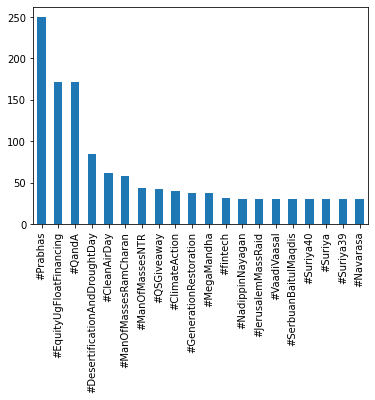

In [177]:
# To plot Top 20 Hashtags
tweets_df['flattened_hashtags'].value_counts()[:20].plot(kind='bar')


### Analyzing data using language attribute

In [178]:
#ploting Tweets by language 
tweets = pd.DataFrame(columns=['original_text','lang'])

tweets['text'] =  tweets_df['original_text'].to_list()
tweets['lang'] = tweets_df['lang'].to_list()

tweets_by_lang = tweets['lang'].value_counts()

IndexError: ignored

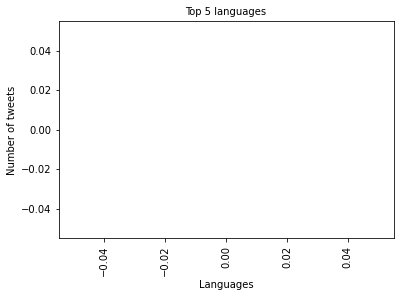

In [179]:
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=10)
ax.set_ylabel('Number of tweets' , fontsize=10)
ax.set_title('Top 5 languages', fontsize=10)
tweets_by_lang.plot(ax=ax, kind='bar', color='orange')

In [150]:
#from Our Language analysis we can see there are differnt languages we can select only tweets with english 
English_tweets = tweets_df.loc[tweets_df['lang'] =="en"]

In [151]:
English_tweets

,original_text,lang,hashtags,flattened_hashtags


###Text Preprocessing

In [152]:
#text Preprocessing
English_tweets['clean_text']=English_tweets['original_text'].astype(str)
English_tweets['clean_text'] = English_tweets['clean_text'].apply(lambda x: x.lower())
English_tweets['clean_text']= English_tweets['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))


In [153]:
plt.figure(figsize=(20, 10))
plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(' '.join(English_tweets.clean_text .values)))
plt.axis('off')
plt.title('Most Frequent Words In Our Tweets',fontsize=16)
plt.show()

ValueError: ignored

<Figure size 1440x720 with 0 Axes>

## **Assignment 2 for Practice** 
Add additional Exploratory analysis function to 

*   Find top 10 mentioned names.



Here we cannot work with text directly when using machine learning algorithms.

Instead, we need to convert the text to numbers.
A simple and effective model for thinking about text documents in machine learning is called the Bag-of-Words Model, or BoW.

The model is simple in that it throws away all of the order information in the words and focuses on the occurrence of words in a tweets/document.

This can be done by assigning each word a unique number. Then any tweet we see can be encoded as a fixed-length vector with the length of the vocabulary of known words. The value in each position in the vector could be filled with a count or frequency of each word in the encoded document.

In [154]:
#Converting tweets to list of words For feature engineering
sentence_list = [tweet for tweet in English_tweets['clean_text']]
word_list = [sent.split() for sent in sentence_list]

word_list[:2]


[]

In [155]:
#Create dictionary which contains Id and word 
word_to_id = corpora.Dictionary(word_list)
for k, v in word_to_id.items():
    print(k,"........",v)

In [156]:
corpus_1[:2] = [word_to_id.doc2bow(tweet) for tweet in word_list]

NameError: ignored

In [157]:
corpus_1[:2]

NameError: ignored

### Modeling